In [ ]:
# Imports
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [ ]:
# Downloading dataset
url = 'https://drive.google.com/uc?id=117LO2wPC6D-Dr2LfkIVZfZDWrVMoEIGR'
df = pd.read_csv(url)
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


# A

In [ ]:
# One hot encoding preprocessing
df = pd.get_dummies(df, columns=['sex', 'smoker', 'region'], drop_first=True)
df

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,False,True,False,False,True
1,18,33.770,1,1725.55230,True,False,False,True,False
2,28,33.000,3,4449.46200,True,False,False,True,False
3,33,22.705,0,21984.47061,True,False,True,False,False
4,32,28.880,0,3866.85520,True,False,True,False,False
...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,True,False,True,False,False
1334,18,31.920,0,2205.98080,False,False,False,False,False
1335,18,36.850,0,1629.83350,False,False,False,True,False
1336,21,25.800,0,2007.94500,False,False,False,False,True


In [ ]:
# Split the data into features (X) and target (y)
X = df.drop(columns=['charges'])
y = df['charges']

# A function to find the optimal split based on RMSE
def find_optimal_split(X, y):
    best_rmse = float("inf")
    best_split = 0
    best_mape = None

    # Test different splits from 10% to 40% for the test set
    for test_size in np.arange(0.1, 0.45, 0.05):
        # Split the data
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)

        # Initialize the scaler and fit on the training data
        scaler = StandardScaler()
        X_train = scaler.fit_transform(X_train)
        X_test = scaler.fit_transform(X_test)

        # Train the model
        model = LinearRegression()
        model.fit(X_train, y_train)

        # Make predictions
        y_pred = model.predict(X_test)

        # Calculate RMSE
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))

        # Check if this split gives a lower RMSE
        if rmse < best_rmse:
            best_rmse = rmse
            best_split = test_size

    return best_split, best_rmse

# Find the optimal split
optimal_split, optimal_rmse = find_optimal_split(X, y)

print('Optimal Test Size:', round(optimal_split, 2))
print('RMSE for the Optimal Split:', optimal_rmse)

Optimal Test Size: 0.15
RMSE for the Optimal Split: 5539.480649366465


# B

In [ ]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

# Initialize the scaler and fit on the training data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

# Train the model and make perdictions
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Calculate metrics
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mape = mean_absolute_percentage_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print("Metrics:")
print("Mean Absolute Percentage Error (MAPE):", mape)
print("Mean Absolute Error (MAE):            ", mae)
print("Mean Squared Error (MSE):             ", mse)
print("Root Mean Squared Error (RMSE):       ", rmse)

Metrics:
Mean Absolute Percentage Error (MAPE): 0.42499069567029774
Mean Absolute Error (MAE):             3989.4608417232453
Mean Squared Error (MSE):              30685845.864705507
Root Mean Squared Error (RMSE):        5539.480649366465


# C

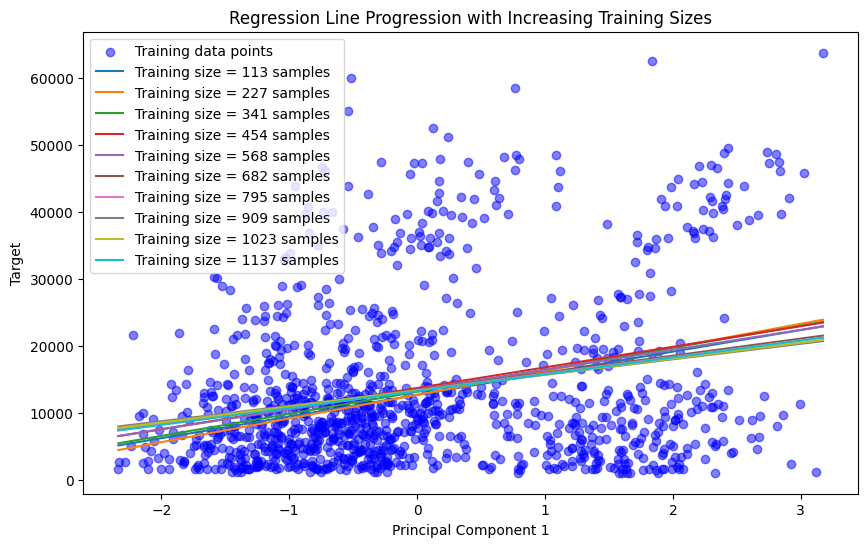

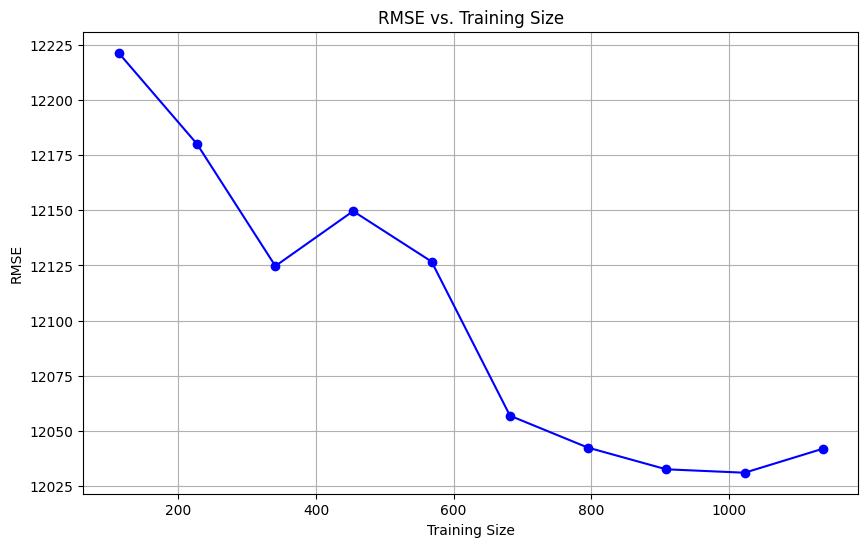

In [ ]:
# Apply PCA to reduce the data to 2D
pca = PCA(n_components=2)
X_train_2d = pca.fit_transform(X_train)
X_test_2d = pca.transform(X_test)

# Initialize the model
model = LinearRegression()

# Define training sizes (percentages) to show the progression of the regression line
training_sizes = [int(len(X_train_2d) * p) for p in [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]]
rmse_values = []

# Plot the data points in 2D space
plt.figure(figsize=(10, 6))
plt.scatter(X_train_2d[:, 0], y_train, color='blue', alpha=0.5, label='Training data points')

# Train and plot regression lines with increasing training sizes
for size in training_sizes:
    # Partial training set
    X_partial_train = X_train_2d[:size]
    y_partial_train = y_train[:size]

    # Train the model on the partial training set
    model.fit(X_partial_train, y_partial_train)

    # Predict on the test set and calculate RMSE
    y_pred = model.predict(X_test_2d)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    rmse_values.append(rmse)

    # Generate a line for the regression line
    line_x = np.linspace(X_train_2d[:, 0].min(), X_train_2d[:, 0].max(), 100).reshape(-1, 1)
    line_x_full = np.hstack([line_x, np.zeros_like(line_x)])  # Keep it in 2D for PCA space
    line_y = model.predict(line_x_full)

    plt.plot(line_x, line_y, label=f'Training size = {size} samples')

plt.xlabel('Principal Component 1')
plt.ylabel('Target')
plt.title('Regression Line Progression with Increasing Training Sizes')
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot([size for size in training_sizes], rmse_values, marker='o', linestyle='-', color='b')
plt.xlabel('Training Size')
plt.ylabel('RMSE')
plt.title('RMSE vs. Training Size')
plt.grid()
plt.show()

#D

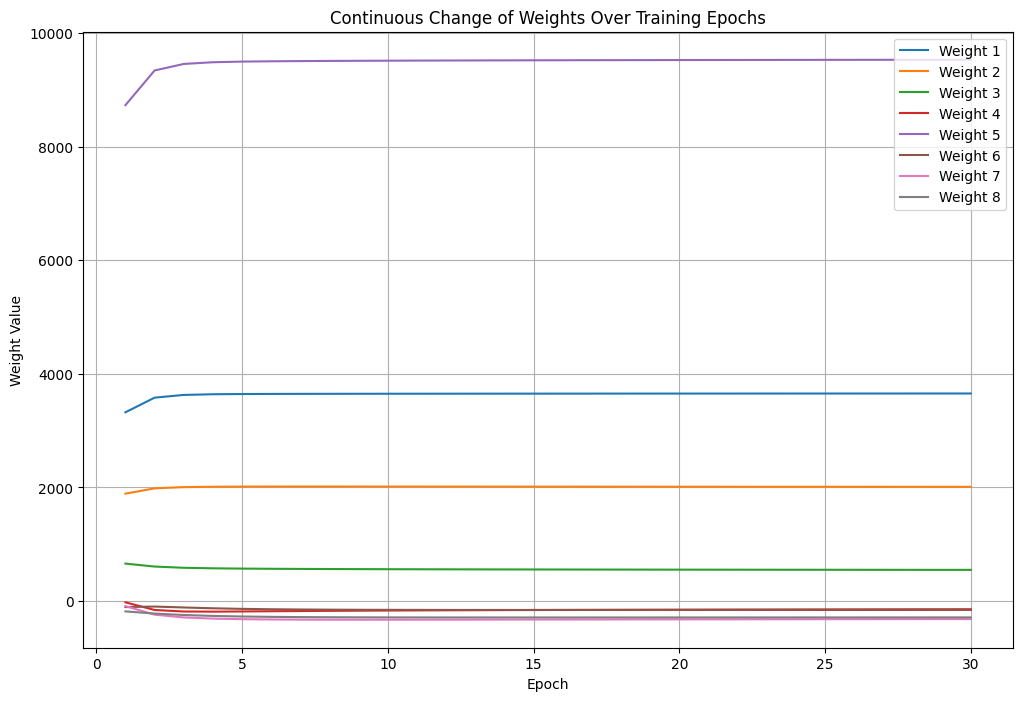

In [ ]:
# Initialize the model
model = SGDRegressor(
    max_iter=1,
    tol=None,
    learning_rate='invscaling',  # adaptive learning rate
    eta0=0.01,  # initial learning rate
    shuffle=True,
    random_state=42,
    alpha=1e-5  # Small regularization
)

# Track weights over iterations
weights_history = []

num_epochs = 30

# Train the model incrementally and track weights
for epoch in range(num_epochs):
    model.partial_fit(X_train, y_train)  # Incremental training
    weights_history.append(model.coef_.copy())  # Store a copy of the weights after each epoch

# Convert weights history to a numpy array for plotting
weights_history = np.array(weights_history)

# Plot each weight's progression as a series of dots over the epochs
plt.figure(figsize=(12, 8))
for i in range(weights_history.shape[1]):
    plt.plot(range(1, num_epochs + 1), weights_history[:, i], label=f'Weight {i+1}')

plt.xlabel('Epoch')
plt.ylabel('Weight Value')
plt.title('Continuous Change of Weights Over Training Epochs')
plt.legend()
plt.grid()
plt.show()